In [2]:
from CFRNode import CFRNode
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import math

Fprice ['0.00', '0.00', '3.00', '1055.39'] ['0.00', '0.00', '0.00', '1.00'] Exp 199996 ['0.00', '0.00', '0.00', '1.00']
Wprice ['520.20', '0.00', '0.00', '0.00'] ['1.00', '0.00', '0.00', '0.00'] Exp 170870 ['1.00', '0.00', '0.00', '0.00']
F|m/0|1--1 ['0.00', '0.00', '711.55'] ['0.00', '0.00', '1.00'] Exp 99996 ['0.00', '0.00', '1.00']
F|m/0|1,1--1,1 ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1748.00'] ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00'] Exp 89204 ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.00']
F|m/1|1--1 ['0.00', '0.00', '1072.53'] ['0.00', '0.00', '1.00'] Exp 99989 ['0.00', '0.00', '1.00']
F|m/2|1--1 ['0.00', '50.12', '1691.58'] ['0.00', '0.03', '0.97'] Exp 78517 ['0.00', '0.03', '0.97']
F|m/0|-1-1 ['0.00', '0.00', '603.83'] ['0.00', '0.00', '1.00'] Exp 99974 ['0.00', '0.00', '1.00']
F|m/0|-1,1-1,1 ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1472.21'] ['0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '0.00', '1.

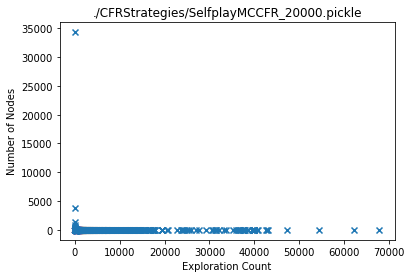

Ignored 0.00030214088397790054


d:\Program Files\Python 3.7.4\lib\site-packages\ipykernel_launcher.py:32: RuntimeWarning: divide by zero encountered in log10


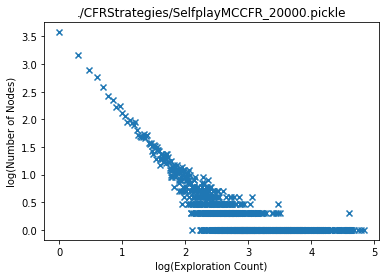

In [3]:
# Log log of number of time infostates in CFR was explored
def ExplorationGraph(filename):
    fd = open(filename, 'rb') 
    STRATEGIES = pickle.load(fd)
    fd.close()

    dic = {}
    counter = 0
    for key,value in STRATEGIES.items():
        if value.explored > 70000:
            print(value, ['{:03.2f}'.format(x) for x in value.get_strategy()])
            counter += 1
            continue
        if value.explored in dic:
            dic[value.explored] += 1
        else:
            dic[value.explored] = 1
            
    myList = dic.items()
    myList = sorted(myList) 
    x,y = zip(*myList) # x = key, y = values

    plt.scatter(x, y, marker="x")
    plt.title(filename)
    plt.xlabel('Exploration Count') 
    plt.ylabel('Number of Nodes')
    plt.show()
    print(f"Ignored {counter/len(STRATEGIES.items())}")

    
    x,y = zip(*myList) # x = key, y = values
    plt.scatter(np.log10(x), np.log10(y), marker="x")
    plt.title(filename)
    plt.xlabel('log(Exploration Count)') 
    plt.ylabel('log(Number of Nodes)')
    plt.show()

ExplorationGraph("./CFRStrategies/SelfplayMCCFR_20000.pickle")

In [ ]:
# Manually review CFR strategies for each infoset
def display_results(i_map,number = 50):
    print()
    print('Strategies:')
    sorted_items = sorted(i_map.items(), key=lambda x: x[1].explored, reverse=True)
    count = 0
    for v in sorted_items:
        if v[1].infoset[0] != "F": continue
        print(v[1], ['{:03.2f}'.format(x) for x in v[1].regret_sum])
        count += 1
        if count > number:
            break
    print()

fd = open("./CFRStrategies/SelfplayMCCFR_20000.pickle", 'rb') 
STRATEGIES = pickle.load(fd)
fd.close()
display_results(STRATEGIES,number = 500)

## Legend

In [ ]:
print("[Experiment <NUMBER OF GAMES PLAYED>] <XAGENT_ WHERE X IS THE NUMBER OF EACH AGENT PLAYING IN THE GAME><M = TRUE IF MONOPOLY MODE><THE TURN CAP IF THERE IS ONE> <TIME EXPERIMENT WAS STARTED>")
print("Sim Ended (<TIME TAKEN TO RUN SIMS> mins)")
print(f"Length > \t<AVG NUMBER OF TURNS EACH GAME>  \t[std] <AVG GAME LENGTH STANDARD DEVIATION> Turns")
print(f"Auctioned > \t<AVG NUMBER OF CONTAINERS AUCTIONED> \t[std] <>")
print(f"SelfBuy %> \t<AVG PERCENT OF AUCTIONS WHERE SELLER IS THE BUYER FOR EACH PLAYER> [std] <>")
print(f"Overbid > \t<AVG DOLLARS EACH PLAYER BIDS OVER THE 2ND HIGHEST BID> [std] <>")
print()
print(f"PCP Produce > \t<AVG DOLLAR PROFIT PER CONTAINER SOLD AT THE FACTORY> [std] <>")
print(f"PCP Wares > \tAVG DOLLAR PROFIT PER CONTAINER SOLD AT THE WAREHOUSE [std] <>")
print(f"PCP SellAuct > \tAVG DOLLAR PROFIT PER CONTAINER FROM BEING THE SELLER AT THE AUCTION [std] <>")
print(f"PCP BuyAuct > \tAVG DOLLAR PROFIT PER CONTAINER FROM BEING A BIDDER AT THE AUCTION [std] <>")
print()
print(f"Produce Rev > \t<AVG DOLLAR SALE PRICE OF EACH CONTAINER SOLD AT THE FACTORY> [std] <>")
print(f"Produce Cost > \t<AVG DOLLAR COST TO PRODUCE EACH CONTAINER SOLD AT THE FACTORY> [std] <>")
print(f"Wares Rev > \t<AVG DOLLAR SALE PRICE OF EACH CONTAINER SOLD AT THE WAREHOUSE> [std] <>")
print(f"Wares Cost > \t<AVG DOLLAR COST TO BUY EACH CONTAINER SOLD AT THE WAREHOUSE> [std] <>")
print(f"SellAuct Rev > \t<AVG DOLLAR SALE PRICE OF EACH CONTAINER SOLD AT THE AUCTION> [std] <>")
print(f"SellAuct Cost> \t<AVG DOLLAR COST TO BUY EACH CONTAINER SOLD AT THE AUCTION> [std] <>")
print()
print(f"% Produce> \t<PERCENT OF TOTAL PROFITS DERIVED FROM THE PRODUCE ACTION> [std] <>")
print(f"% Wares> \t<PERCENT OF TOTAL PROFITS DERIVED FROM THE BUY PRODUCE ACTION> [std] <>")
print(f"% SellAuct> \t<PERCENT OF TOTAL PROFITS DERIVED FROM THE BUY WARES ACTION> [std] <>")
print(f"% BuyAuct> \t<PERCENT OF TOTAL PROFITS DERIVED FROM BIDDING IN AUCTIONS> [std] <>")


print("\nPlayer <AI NAME>, Placements <NUMBER OF TIMES AGENT PLACED 1ST,2ND,...>, Avg Score <AVG VALUE OF CONTAINERS AT THE END OF GAME> [std] <>, Avg Normalised Score <>, [std] <>")
print(f" <ACTION 1> > \t<PERCENTAGE OF TOTAL ACTIONS THAT ARE ACTION 1> [std <>] ")#, end="\n" if i%3==2 else "")


## Games Types Being played for each configuration

(X-1) Random + 1 Test<br>
(X-1) Best + 1 Test<br>
(X-1) History + 1 Test<br>
(X-1) Test + 1 Best<br>
(X-1) Test + 1 History<br>

In [4]:
CASES = ["Rand_1","Best_1","History_1","Best_2","History_2"]
CASE_NAMES = ["(Exploit env)","(Adverse env)","(Adaptive env)","(against Exploit)","(against Adaptive)"]
STATS = [
    "SelfBuy %",
    "Overbid",
    "PCP Produce",
    "PCP Wares",
    "PCP SellAuct",
    "PCP BuyAuct",
    "Produce Rev",
    "Wares Rev",
    "SellAuct Rev",
    "Produce Cost",
    "Wares Cost",
    "SellAuct Cost",
    "% Produce",
    "% Wares",
    "% SellAuct",
    "% BuyAuct",
]

STATS_NAMES = {
    "SelfBuy %":"Percentage of Auctions Rejected",
    "Overbid":"Overbid ($ per container)",
    "PCP Produce": "Profit from Production ($ per container)",
    "PCP Wares": "Profit from Warehousing ($ per container)",
    "PCP SellAuct": "Profit from Auctions as Seller ($ per container)",
    "PCP BuyAuct": "Profit from Auctions as Buyer ($ per container)",
    "Produce Rev": "Revenue from Selling Produce ($ per container)",
    "Wares Rev": "Revenue from Selling Wares ($ per container)",
    "SellAuct Rev": "Revenue from Selling at Auction ($ per container)",
    "Produce Cost":"Cost from Producing Produce ($ per container)",
    "Wares Cost":"Cost from Buying Produce ($ per container)",
    "SellAuct Cost":"Cost from Buying Wares ($ per container)",
    "% Produce":"Percentage of Profits Trading Produce",
    "% Wares":"Percentage of Profits Trading Wares",
    "% SellAuct":"Percentage of Profits Trading Cargo",
    "% BuyAuct":"Percentage of Profits from participating in Auctions",
    "Auctioned":"Total Number of Containers Auctioned",
    "Produce": "Production",
    "Wares": "Warehousing",
    "SellAuct": "Selling at Auctions",
}

In [5]:
# function to add value labels
def addlabels(x,y,spacing = 0.05, dp = 1):
    for i in range(len(x)):
        plt.text(x[i], y[i]+spacing, truncate(y[i],dp), ha = 'center')

# from https://stackoverflow.com/questions/8595973/truncate-to-three-decimals-in-python
def truncate(number, digits) -> float:
    # Improve accuracy with floating point operations, to avoid truncate(16.4, 2) = 16.39 or truncate(-1.13, 2) = -1.12
    if len(str(number).split('.')) == 1 : return number
    nbDecimals = len(str(number).split('.')[1]) 
    if nbDecimals <= digits:
        return number
    stepper = 10.0 ** digits
    return math.trunc(stepper * number) / stepper

In [6]:
# returns a dict of experiments found in file
# <test>: {game stats}
def get_game_from_file(file):
    game = {}
    game["name"] = file.split("_")[-1][:-4] #name of experiment

    STATS = [
        "SelfBuy %",
        "Overbid",
        "PCP Produce",
        "PCP Wares",
        "PCP SellAuct",
        "PCP BuyAuct",
        "Produce Rev",
        "Wares Rev",
        "SellAuct Rev",
        "Produce Cost",
        "Wares Cost",
        "SellAuct Cost",
        "% Produce",
        "% Wares",
        "% SellAuct",
        "% BuyAuct",
    ]

    ACTIONS = [ # must be in the same order as appears
        "Produce","Buy Produce","Buy Wares","Auction", "Pass"
    ]

    fd = open(file,"r")
    lines = fd.readlines()
    found_player = True
    for index,line in enumerate(lines):
        if line.startswith("[Experiment"):
            line = line.split(" ")
            gametype = line[3]
            game[gametype] = {} #data of from this experiment
            found_player = False

        elif line.startswith("Auctioned"):
            game[gametype]["Auctioned"] = float(line.split("\t")[1].split(",")[0])

        elif line.startswith("Player"):
            if not found_player:
                l = line.split(", Avg ")
                game[gametype]["Placement"] = list(l[0].split("Placements ")[1][1:-1].split(", "))
                game[gametype]["Placement"] = [int(x) for x in game[gametype]["Placement"]]
                game[gametype]["Avg Score"] = float(l[1].split(" ")[1])
                game[gametype]["Normalized Score"] = float(l[2].split(" ")[2][:-1])
                for i,action in enumerate(ACTIONS):
                    game[gametype][action] = float(lines[index+1+i].split("\t")[1].split(" ")[0])
                found_player = True

        else:
            for s in STATS:
                if line.startswith(s):
                    game[gametype][s] = float(line.split("\t")[1].split(",")[0][1:])
                    break

    fd.close()
    return game

def get_opponent_game_from_file(file):
    game = {}
    game["name"] = file.split("_")[-1][:-4] #name of experiment

    STATS = [
        "SelfBuy %",
        "Overbid",
        "PCP Produce",
        "PCP Wares",
        "PCP SellAuct",
        "PCP BuyAuct",
        "Produce Rev",
        "Wares Rev",
        "SellAuct Rev",
        "Produce Cost",
        "Wares Cost",
        "SellAuct Cost",
        "% Produce",
        "% Wares",
        "% SellAuct",
        "% BuyAuct",
    ]

    ACTIONS = [ # must be in the same order as appears
        "Produce","Buy Produce","Buy Wares","Auction", "Pass"
    ]

    fd = open(file,"r")
    lines = fd.readlines()
    found_player = True
    for index,line in enumerate(lines):
        if line.startswith("[Experiment"):
            line = line.split(" ")
            gametype = line[3]
            game[gametype] = {} #data of from this experiment
            found_player = False

        elif line.startswith("Auctioned"):
            game[gametype]["Auctioned"] = float(line.split("\t")[1].split(",")[0])

        elif line.startswith("Player"): # last player
            l = line.split(", Avg ")
            game[gametype]["Placement"] = list(l[0].split("Placements ")[1][1:-1].split(", "))
            game[gametype]["Placement"] = [int(x) for x in game[gametype]["Placement"]]
            game[gametype]["Avg Score"] = float(l[1].split(" ")[1])
            game[gametype]["Normalized Score"] = float(l[2].split(" ")[2][:-1])
            for i,action in enumerate(ACTIONS):
                game[gametype][action] = float(lines[index+1+i].split("\t")[1].split(" ")[0])
            found_player = True

        else:
            for s in STATS:
                if line.startswith(s):
                    game[gametype][s] = float(line.split("\t")[1].split(",")[2].split("]")[0]) # player 2 (last player)
                    break

    fd.close()
    return game

In [7]:
data = [] # storage for all stats
#ROOT_DIR = ".\\experiments\\Perfect" # reads all files in this folder
#ROOT_DIR = ".\\experiments\\Heuristic"
ROOT_DIR = ".\\experiments\\Imperfect"
for dir_name, subdir_list, file_list in os.walk(ROOT_DIR, topdown=True):
    for fname in file_list:
        data.append(get_game_from_file(os.path.join(dir_name, fname))) # agent pov
        #data.append(get_opponent_game_from_file(os.path.join(dir_name, fname))) # env agent pov

# one experiment
#print(data[0])
print()

# check if same experiments
for x in data:
    name = x["name"]
    print(f"{name} {x.keys()}")


BaseISMCTS dict_keys(['name', '2Rand_1MCTSAgentI1', '2Best_1MCTSAgentI1', '2History_1MCTSAgentI1', '1Best_2MCTSAgentI1', '1History_2MCTSAgentI1'])
BestRandomISMCTS dict_keys(['name', '2Rand_1BestMCTSAgentI1', '2Best_1BestMCTSAgentI1', '2History_1BestMCTSAgentI1', '1Best_2BestMCTSAgentI1', '1History_2BestMCTSAgentI1'])
HistISMCTS dict_keys(['name', '2Rand_1HistMCTSAgentI1', '2Best_1HistMCTSAgentI1', '2History_1HistMCTSAgentI1', '1Best_2HistMCTSAgentI1', '1History_2HistMCTSAgentI1'])


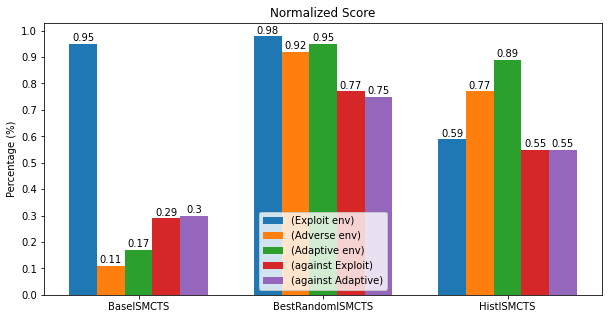

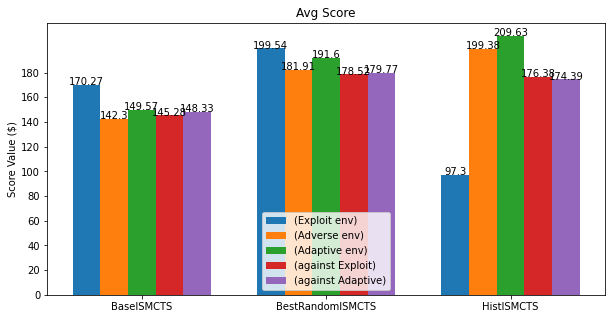

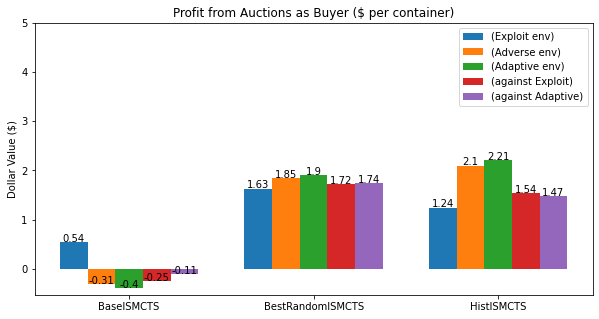

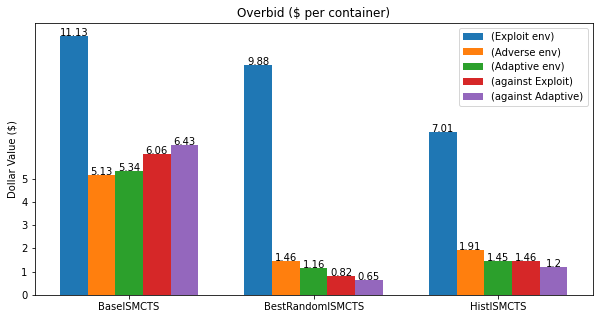

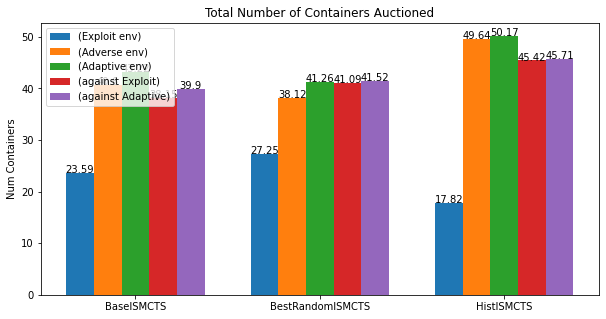

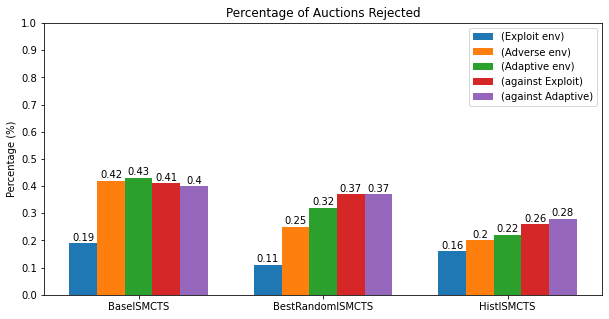

In [8]:
# single value per experiment
for TYPE in ["Normalized Score","Avg Score","PCP BuyAuct","Overbid","Auctioned","SelfBuy %"]:
    values = [[] for x in range(len(CASES))]

    DP = 2
    xticks = []
    width = 0.15

    for experiment in data:
        for key in experiment:
            for i,CASE in enumerate(CASES):
                if CASE in key:
                    values[i].append(round(experiment[key][TYPE],DP))
        xticks.append(experiment["name"])

    br = np.arange(len(values[0]))
    fig = plt.subplots(figsize =(10, 5))
    #plt.xticks(br, xticks)
    #plt.tick_params(axis="x", rotation=80)

    for i,CASE in enumerate(CASES):
        #print(CASE,br, values[i], width)
        p1 = plt.bar(br, values[i], width, label = CASE_NAMES[i])
        addlabels(br, values[i], spacing = 0.01, dp = 2)
        br = [x + width for x in br]
        if len(CASES)%2 == 1 and i+1 == len(CASES)//2:
            plt.xticks(br, xticks)

    if TYPE in ["Normalized Score","SelfBuy %"]: 
        plt.ylabel('Percentage (%)')
        plt.yticks(np.arange(0, 1.1,0.1))
        if TYPE == "Normalized Score": plt.legend(loc='lower center')
        else: plt.legend()
    elif TYPE in ["Auctioned"]: 
        plt.ylabel('Num Containers')
        plt.yticks(np.arange(0, 60,10))
        plt.legend()
    elif TYPE in ["Overbid","PCP BuyAuct"]: 
        plt.ylabel('Dollar Value ($)')
        plt.yticks(np.arange(0, 6,1))
        plt.legend()
    elif TYPE in ["Avg Score"]: 
        plt.ylabel('Score Value ($)')
        plt.yticks(np.arange(0, 200,20))
        plt.legend(loc='lower center')
    plt.title(f'{STATS_NAMES[TYPE] if TYPE in STATS_NAMES else TYPE}')
    #plt.legend(loc='lower center')
    #plt.legend()
    plt.show()


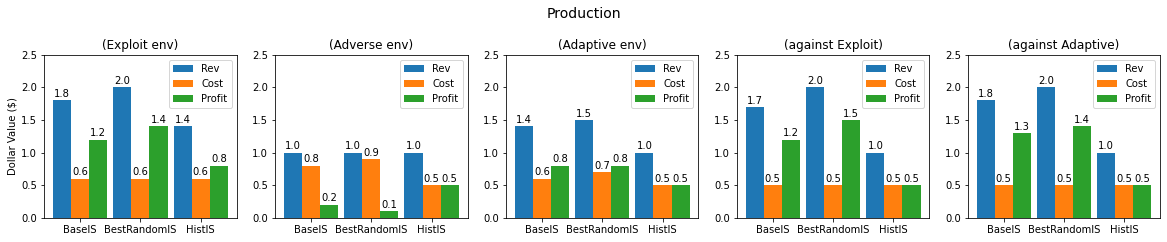

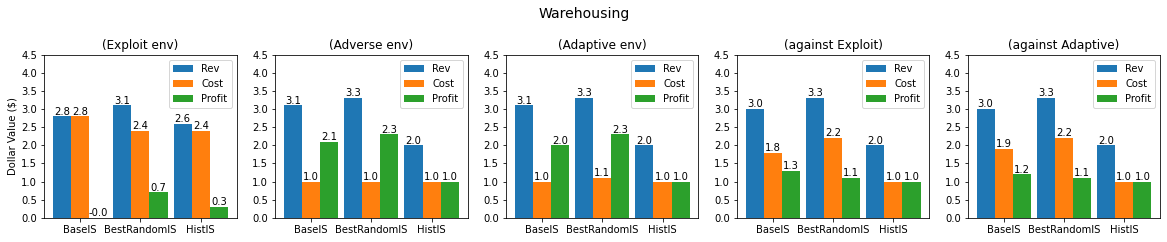

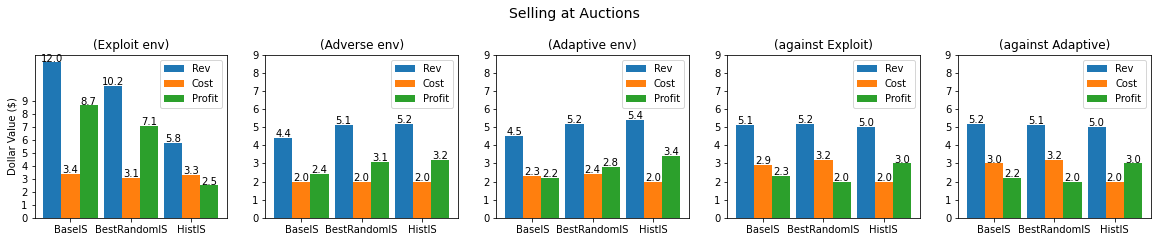

In [9]:
# cost, rev pairing
for TYPE in ["Produce","Wares","SellAuct"]:
    fig = plt.figure(figsize =(20, 3))
    plt.tight_layout()
    count = 1
    for CASE in CASES:
        DP = 1
        cost = []
        rev = []
        profit = []
        xticks = []
        width = 0.3

        for experiment in data:
            for key in experiment: 
                if CASE in key:
                    cost.append(round(experiment[key][f"{TYPE} Cost"],DP))
                    rev.append(round(experiment[key][f"{TYPE} Rev"],DP))
                    profit.append(round(experiment[key][f"PCP {TYPE}"],DP))
                    xticks.append(experiment["name"][:-4])

        br1 = np.arange(len(cost))
        br2 = [x + width for x in br1]
        br3 = [x + width for x in br2]
        plt.subplot(1,len(CASES),count)
        count += 1
        p2 = plt.bar(br1, rev, width, label ='Rev')
        p1 = plt.bar(br2, cost, width, label ='Cost')
        p3 = plt.bar(br3, profit, width, label ='Profit')
        if count == 2: plt.ylabel('Dollar Value ($)')
        plt.title(f'{CASE_NAMES[CASES.index(CASE)]}')
        plt.xticks(br2, xticks)
        #plt.tick_params(axis="x", rotation=-15)
        addlabels(br2,cost)
        addlabels(br1,rev)
        addlabels(br3,profit)
        if TYPE == "Produce": plt.yticks(np.arange(0, 3,0.5))
        elif TYPE == "Wares": plt.yticks(np.arange(0, 5,0.5))
        elif TYPE == "SellAuct": plt.yticks(np.arange(0, 10,1))
        plt.legend()

    fig.suptitle(f'{STATS_NAMES[TYPE] if TYPE in STATS_NAMES else TYPE}', fontsize=14, y= 1.1)
    plt.show()

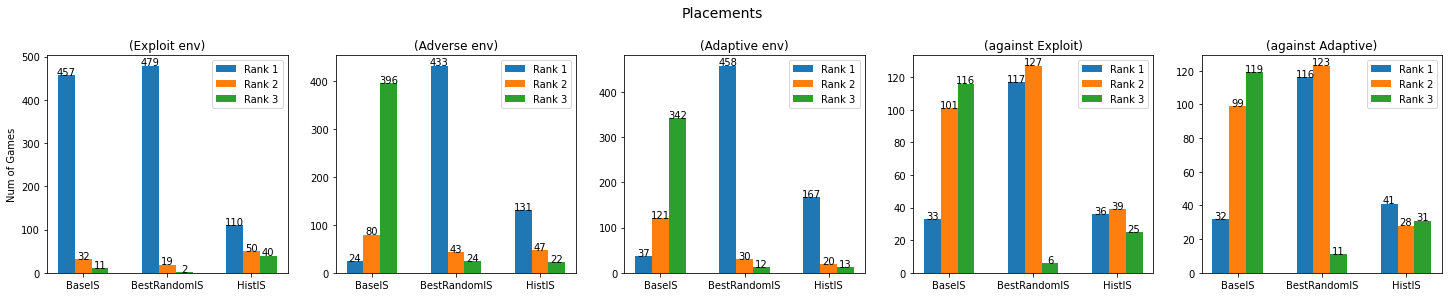

In [10]:
# placements
fig = plt.figure(figsize =(25, 4))
plt.tight_layout()
count = 1
for CASE in CASES:
    DP = 1
    PLAYERS = 3
    p = [[] for x in range(PLAYERS)]
    xticks = []
    width = 0.2

    for experiment in data:
        for key in experiment: 
            if CASE in key:
                for i in range(PLAYERS):
                    p[i].append(experiment[key]["Placement"][i])
                xticks.append(experiment["name"][:-4])

    br = np.arange(len(p[0]))
    
    #plt.tick_params(axis="x", rotation=80)
    plt.subplot(1,len(CASES),count)
    count += 1
    for i in range(PLAYERS):
        p1 = plt.bar(br, p[i], width, label = f"Rank {i+1}")
        addlabels(br,p[i])
        if i == 1: plt.xticks(br, xticks)
        br = [x + width for x in br]

    if count == 2: plt.ylabel('Num of Games')
    plt.title(f'{CASE_NAMES[CASES.index(CASE)]}')
    #plt.yticks(np.arange(0, 5,0.5))
    plt.legend()
fig.suptitle(f'Placements', fontsize=14, y= 1.05)
plt.show()

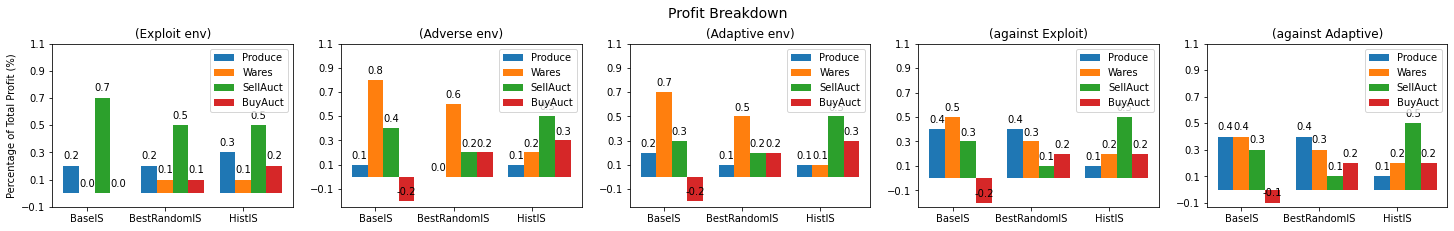

In [11]:
fig = plt.figure(figsize =(25, 3))
plt.tight_layout()
count = 1
for CASE in CASES:
    DP = 1
    Produce = []
    Wares = []
    SellAuct = []
    BuyAuct = []
    xticks = []
    width = 0.2

    for experiment in data:
        for key in experiment: 
            if CASE in key:
                Produce.append(round(experiment[key][f"% Produce"],DP))
                Wares.append(round(experiment[key][f"% Wares"],DP))
                SellAuct.append(round(experiment[key][f"% SellAuct"],DP))
                BuyAuct.append(round(experiment[key][f"% BuyAuct"],DP))
                xticks.append(experiment["name"][:-4])

    br1 = np.arange(len(Produce))
    br2 = [x + width for x in br1]
    br3 = [x + width for x in br2]
    br4 = [x + width for x in br3]
    plt.subplot(1,len(CASES),count)
    count += 1
    p2 = plt.bar(br1, Produce, width, label ='Produce')
    p1 = plt.bar(br2, Wares, width, label ='Wares')
    p3 = plt.bar(br3, SellAuct, width, label ='SellAuct')
    p4 = plt.bar(br4, BuyAuct, width, label ='BuyAuct')
    if count == 2: plt.ylabel('Percentage of Total Profit (%)')
    plt.title(f'{CASE_NAMES[CASES.index(CASE)]}')
    plt.xticks(br2, xticks)
    #plt.tick_params(axis="x", rotation=-15)
    addlabels(br1,Produce)
    addlabels(br2,Wares)
    addlabels(br3,SellAuct)
    addlabels(br4,BuyAuct)
    plt.yticks(np.arange(-0.1, 1.1,0.2))
    plt.legend()
fig.suptitle(f'Profit Breakdown', fontsize=14, y= 1.05)
plt.show()

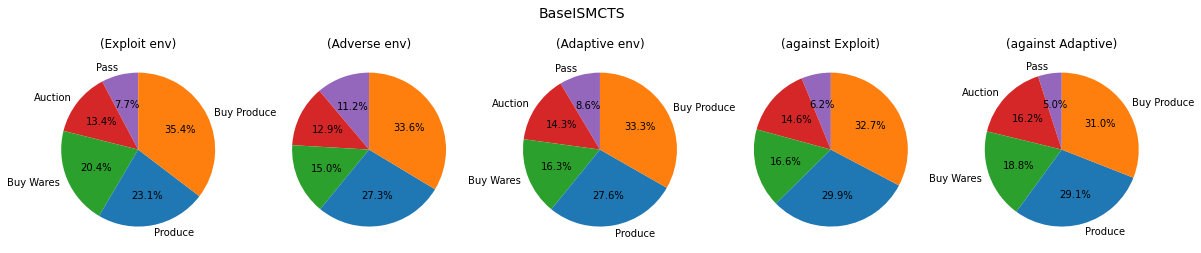

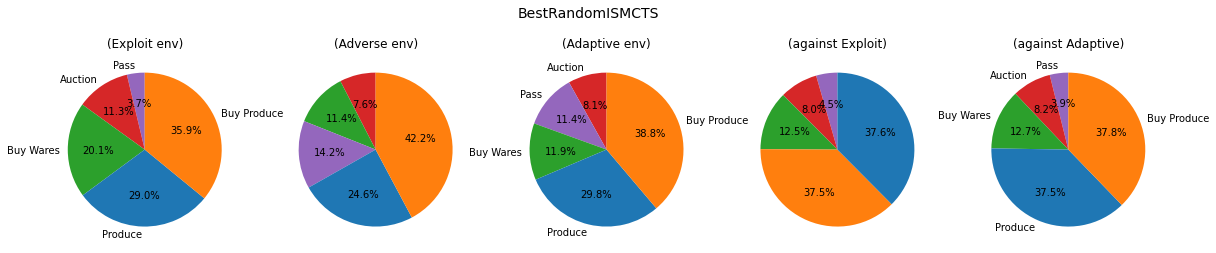

d:\Program Files\Python 3.7.4\lib\site-packages\ipykernel_launcher.py:26: MatplotlibDeprecationWarning: normalize=None does not normalize if the sum is less than 1 but this behavior is deprecated since 3.3 until two minor releases later. After the deprecation period the default value will be normalize=True. To prevent normalization pass normalize=False 


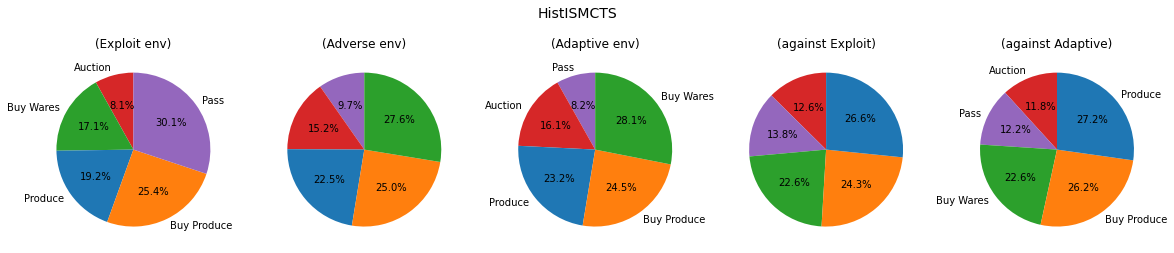

In [13]:
# policy circle
DP = 2
ACTIONS = ["Produce","Buy Produce","Buy Wares","Auction", "Pass"]
colours = {'Produce': 'C0','Buy Produce': 'C1','Buy Wares': 'C2','Auction': 'C3','Pass': 'C4'}

for experiment in data: # for each file
    fig = plt.figure(figsize =(20, 5))
    fig.set_facecolor('white')
    plt.tight_layout()
    count = 1
    for CASE in CASES:
        for key in experiment: # for each experiment 
            percent = []
            if CASE in key: # for each games against agent
                for action in ACTIONS:
                    percent.append(experiment[key][action])
                #fig = plt.figure(figsize = (3, 7))
                plt.subplot(1,len(CASES),count)
                count += 1

                ordered = list(zip(percent, ACTIONS))
                ordered = sorted(ordered, key = lambda x: x[0])
                sorted_percent, sorted_labels = zip(*ordered)

                if count%2 ==  1: plt.pie(sorted_percent, autopct='%1.1f%%',colors=[colours[key] for key in sorted_labels], startangle=-270)
                else: plt.pie(sorted_percent, labels = sorted_labels, autopct='%1.1f%%',colors=[colours[key] for key in sorted_labels], startangle=-270)
                plt.title(CASE_NAMES[CASES.index(CASE)])
    fig.suptitle(f'{experiment["name"]}', fontsize=14, y= 0.9)
    plt.show()